Original shape: (150, 4)
Scaled shape: (150, 4)


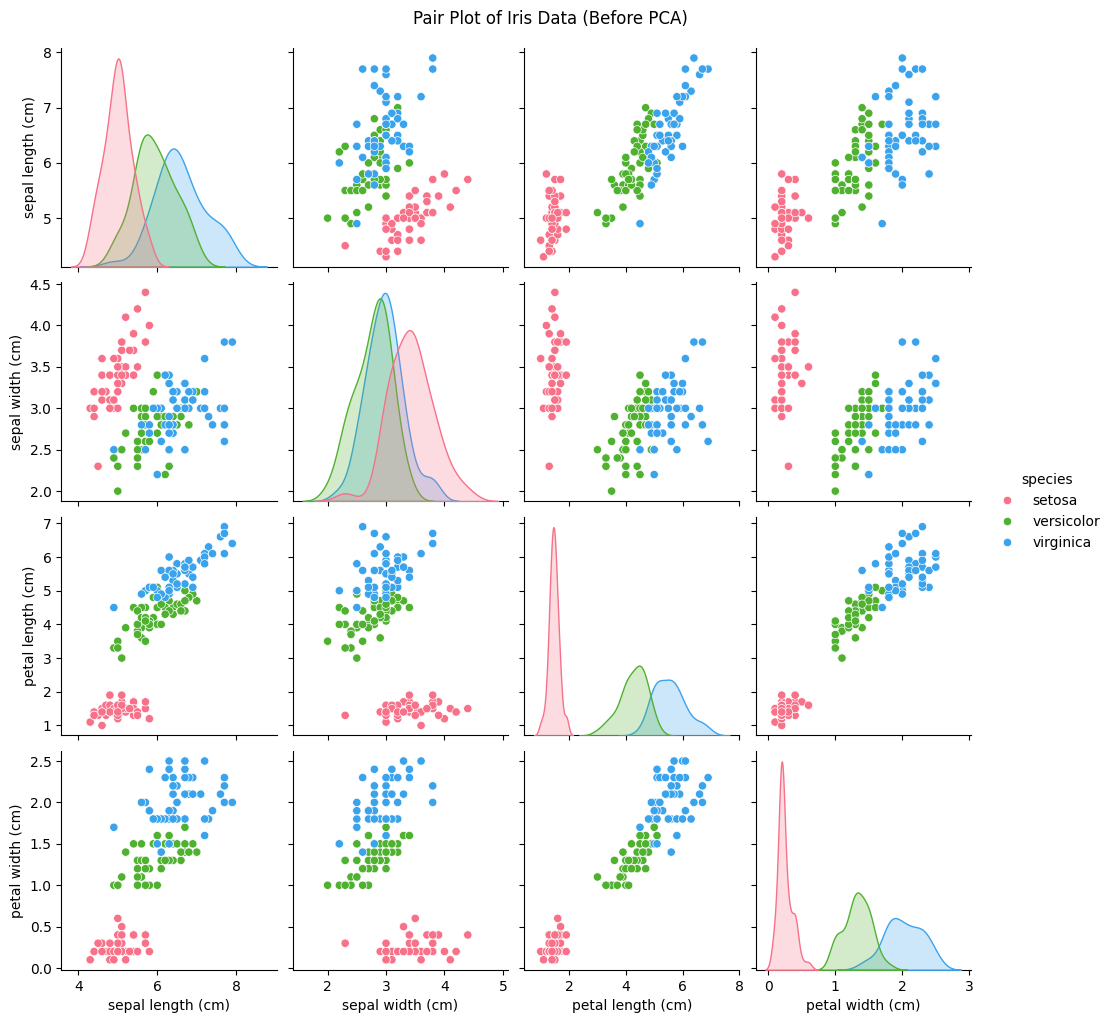

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Load Data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original shape:", X.shape)
print("Scaled shape:", X_scaled.shape)

# 3. Visualize raw data with a Pair Plot
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y
# Map target numbers to target names for legend
iris_df['species'] = iris_df['species'].map({0: target_names[0], 1: target_names[1], 2: target_names[2]})

sns.pairplot(iris_df, hue='species', palette='husl')
plt.suptitle("Pair Plot of Iris Data (Before PCA)", y=1.02)
plt.show()

In [2]:
# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Transformed shape:", X_pca.shape)

# Explained Variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Transformed shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000166


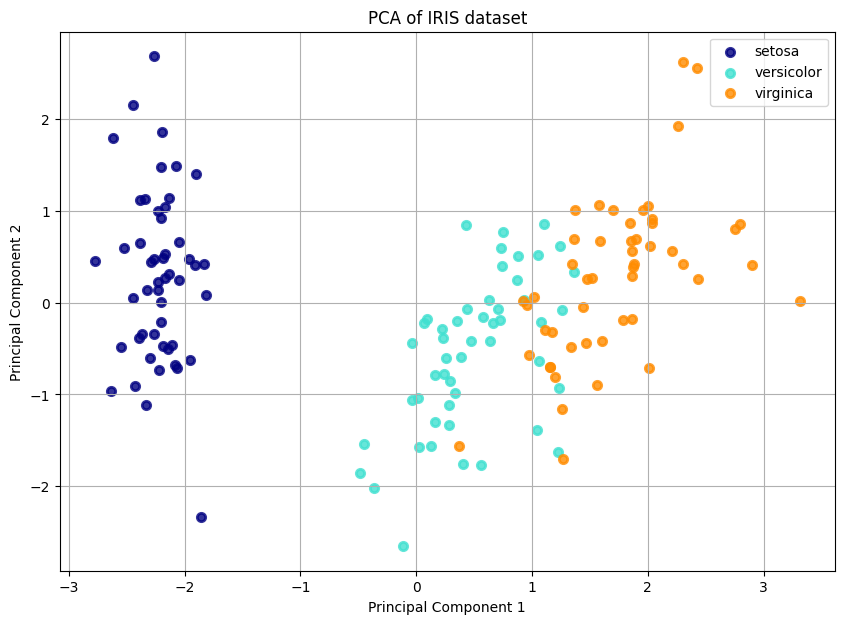

In [3]:
# 4. Visualize the results
plt.figure(figsize=(10, 7))
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()